In [1]:
import pandas as pd


In [2]:
# Next I load the Iris data set into a data frame using df in pandas
# A DataFrame is a 2 dimensional data structure, like a 2 dimensional array,or a table with rows and columns.
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')



In [3]:


# If we want to see the number of each Species column, we can use this:
df["species"].value_counts() 


species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [4]:
print(df.isnull())


     sepal_length  sepal_width  petal_length  petal_width  species
0           False        False         False        False    False
1           False        False         False        False    False
2           False        False         False        False    False
3           False        False         False        False    False
4           False        False         False        False    False
..            ...          ...           ...          ...      ...
145         False        False         False        False    False
146         False        False         False        False    False
147         False        False         False        False    False
148         False        False         False        False    False
149         False        False         False        False    False

[150 rows x 5 columns]


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
from io import StringIO

# Capture the output of df.info() into a string - for this String IO section, I could not find why the info section would not print to the file
# So I looked it up on chat GPT and it suggested using this. I did further research and added it to the readme file. 
buffer = StringIO()
df.info(buf=buffer)
info_output = buffer.getvalue()
buffer.close()

# This section I created myself .

with open(r"iris_summary.txt", "w") as f:

    describe = str(df.describe())
    info = str(df.info()) 
    null = str(df.isnull().sum)
    summary =  info_output + "\n\n" + describe + "\n\n" + null

    # Write the summary to the file
    f.write(summary)

 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [8]:


# The data set is clean, has no missing values and is ready for analysis.

# We will look at how some of these individual variables look different charts and plots.
# In order to do this, we must import matplotlib, it is a library for data visualization.
import matplotlib.pyplot as plt



#

In [9]:
#Seaborn can be imported and used by matplotlib to draw its plots
import seaborn as sns
# We can pull in the colour palette from seaborn and set our colours to distinguish the different iris species.

#


In [22]:
import numpy as np


In [11]:
# To ignore warnings, re: the figure layout changes, we import the warnings module
import warnings
warnings.filterwarnings('ignore')

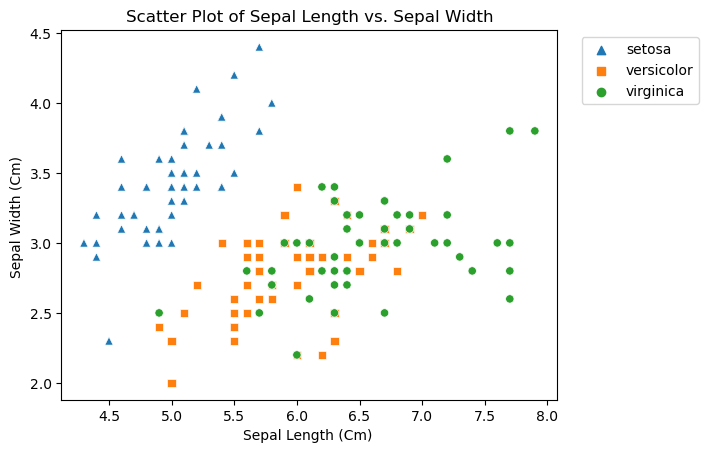

In [12]:
# Draw a scatterplot of the sepal length vs sepal width and show the plots in different shapes to identify them clearly
sns.scatterplot(df, x="sepal_length", y="sepal_width", hue="species", style="species", markers={"setosa": "^", "versicolor": "s", "virginica": "o"})
plt.title("Scatter Plot of Sepal Length vs. Sepal Width")
plt.xlabel("Sepal Length (Cm) ")
plt.ylabel("Sepal Width (Cm) ")
plt.legend(loc='upper right', bbox_to_anchor=(1.30, 1))
plt.savefig('Scatter plot of Sepal Length vs Sepal Width ', bbox_inches='tight')
plt.show()


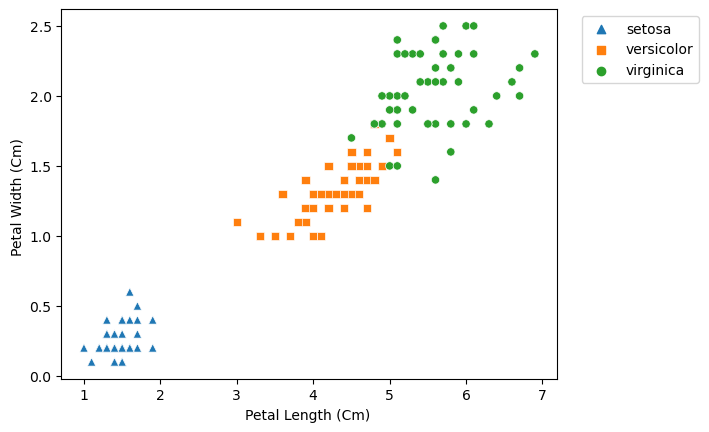

In [13]:
sns.scatterplot(df, x="petal_length", y="petal_width", hue="species", style="species", markers={"setosa": "^", "versicolor": "s", "virginica": "o"})
plt.xlabel("Petal Length (Cm) ")
plt.ylabel("Petal Width (Cm) ")
plt.legend(loc='upper right', bbox_to_anchor=(1.30, 1)) 
plt.savefig('Scatter plot of Sepal Length vs Sepal Width ', bbox_inches='tight')
plt.show()

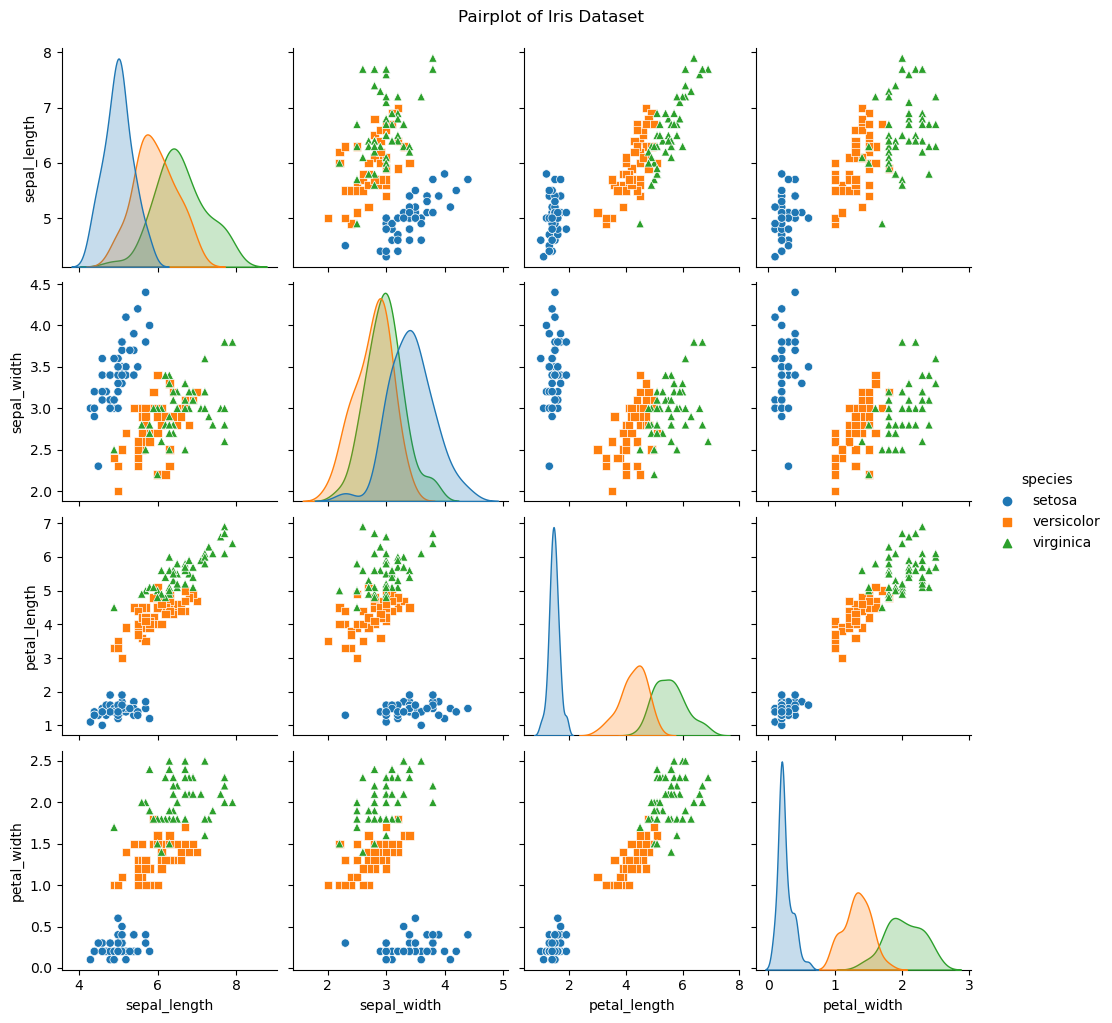

In [29]:
# Show the variable in a pairplot using seaborn
sns.pairplot(df, hue="species", markers=["o", "s", "^"])
plt.suptitle("Pairplot of Iris Dataset", y=1.02)
plt.savefig('Pairplot of Iris Dataset', bbox_inches='tight')
plt.show()
  
  


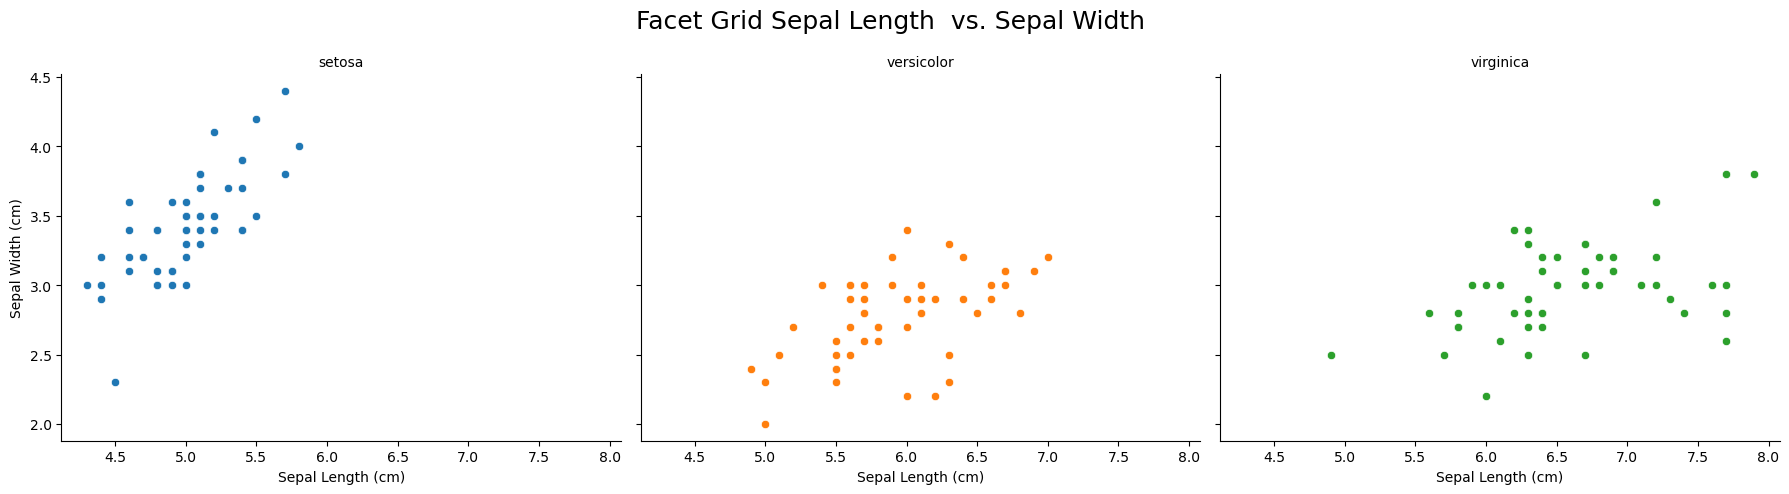

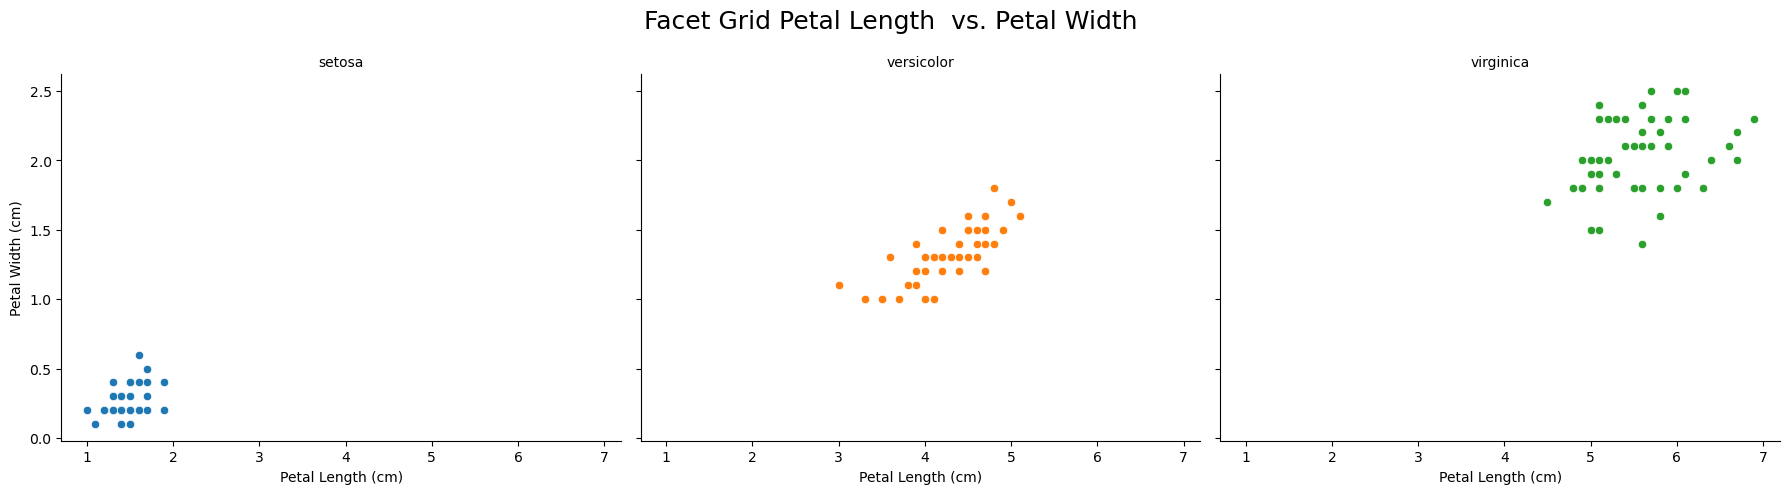

In [14]:
# From the scatterplot, 
# We can show the scatterplots separately using facet grids:

g = sns.FacetGrid(df, col="species",  hue="species", height=5, aspect=1.2)
g.map(sns.scatterplot, "sepal_length", "sepal_width")
g.set_axis_labels("Sepal Length (cm)", "Sepal Width (cm)")
g.set_titles("{col_name}")

plt.subplots_adjust(top=0.85) 
plt.suptitle("Facet Grid Sepal Length  vs. Sepal Width ", fontsize=18)
plt.savefig('Facet Grid Scatter plot of Sepal Length vs Sepal Width of Iris Species', bbox_inches='tight')
plt.show()

g = sns.FacetGrid(df, col="species",  hue="species", height=5, aspect=1.2)
g.map(sns.scatterplot, "petal_length", "petal_width")
g.set_axis_labels("Petal Length (cm)", "Petal Width (cm)")
g.set_titles("{col_name}")

plt.subplots_adjust(top=0.85) 
plt.suptitle("Facet Grid Petal Length  vs. Petal Width ", fontsize=18)
plt.savefig('Facet Grid Scatter plot of Petal Length vs Petal Width of Iris Species', bbox_inches='tight')
plt.show()

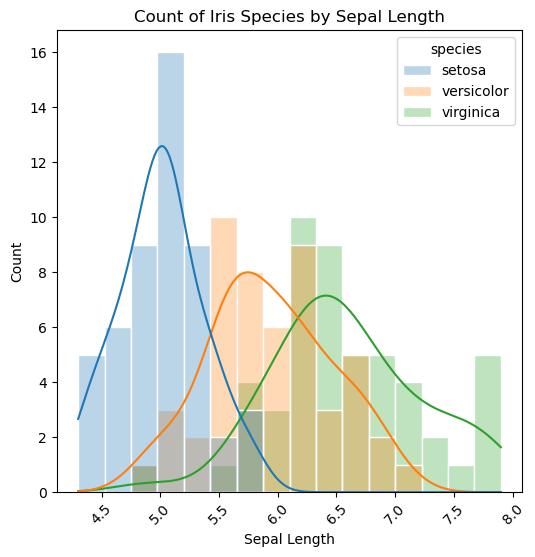

In [15]:

# Plot
plt.figure(figsize=(6, 6))
sns.histplot(df, x='sepal_length', hue="species", edgecolor = "white", multiple="layer", kde=True, bins=16, alpha=0.3)
plt.title('Count of Iris Species by Sepal Length')
plt.legend
plt.xlabel('Sepal Length')
plt.ylabel('Count')
plt.xticks(rotation=45) 
plt.savefig('Count of Iris Species by Sepal Length')
plt.show()

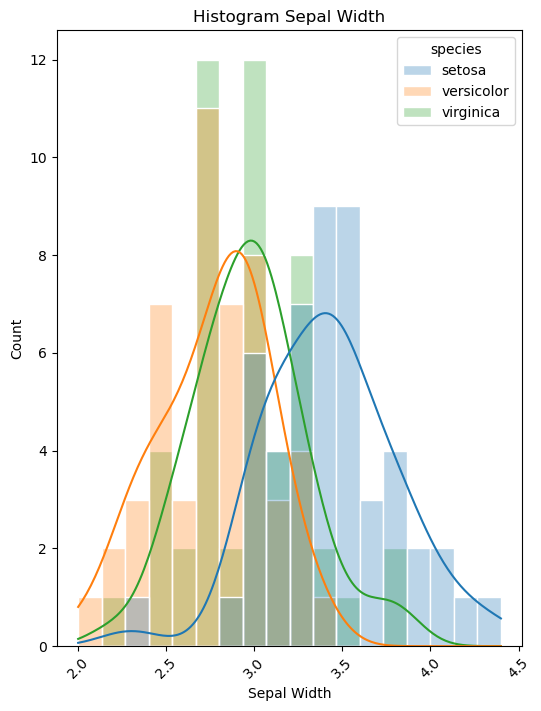

In [16]:
plt.figure(figsize=(6, 8))
sns.histplot(df, x='sepal_width', hue="species", edgecolor = "white", multiple="layer", kde=True, bins=18, alpha=0.3)
plt.title('Histogram Sepal Width')
plt.legend
plt.xlabel('Sepal Width')
plt.ylabel('Count')
plt.xticks(rotation=45) 
plt.savefig('Histogram Sepal Width')
plt.show()

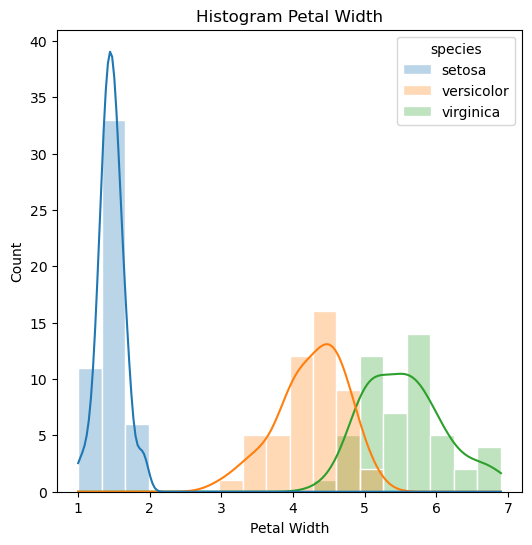

In [17]:
# Do a histogram of petal width
plt.figure(figsize=(6, 6))
sns.histplot(df, x='petal_length', hue="species", edgecolor = "white", multiple="layer", kde=True, bins=18, alpha=0.3)
plt.title('Histogram Petal Width')
plt.legend
plt.xlabel('Petal Width')
plt.ylabel('Count')

plt.savefig('Histogram Petal Width')
plt.show()


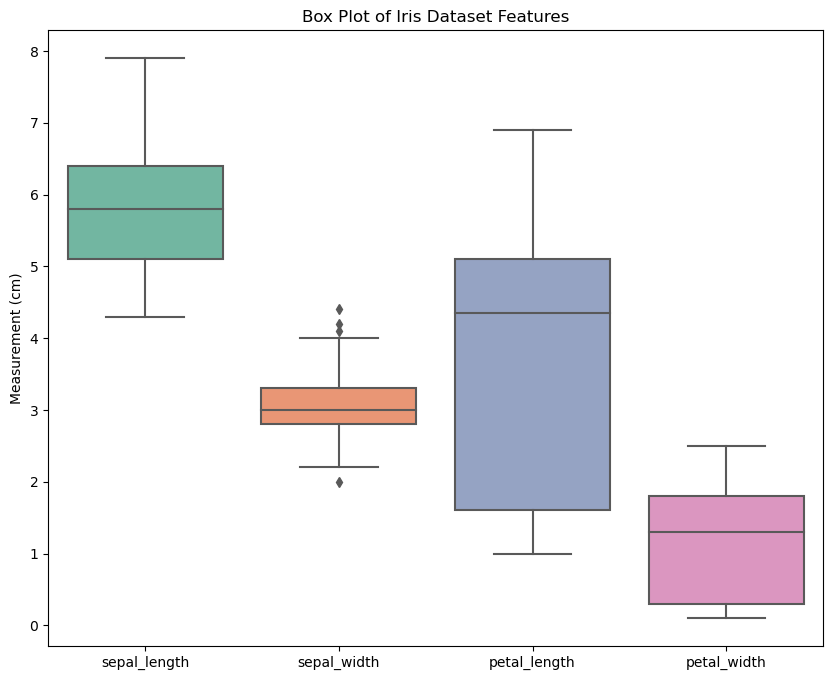

In [18]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df, orient="v", palette="Set2")
plt.ylabel('Measurement (cm)')
plt.title('Box Plot of Iris Dataset Features')
plt.show()

In [24]:
# Correlation: 
# A correlation exists between two variables when one of them is related to the other in someway.
# The correlation coefficient is a statistical measure of the strength and direction of a linear relationship between two variables.
# A coefficient of 1 shows a perfect positive correlation or a direct relationship. 
# The correlation coefficient between sepal length and sepal width is 0.873
# The correlation coefficient between petal length and petal width is 0.873
# indicates a strong positive linear relationship 
# between the two variables


x = df['sepal_length'].values
y = df['sepal_width'].values

correlation = np.corrcoef(x, y)
print("Correlation coefficient between sepal length and sepal width:", correlation)

f = df['petal_length'].values
g = df['petal_width'].values

correlation2 = np.corrcoef(f, g)
print("Correlation coefficient between petal length and petal width:", correlation2)



Correlation coefficient between sepal length and sepal width: [[ 1.         -0.11756978]
 [-0.11756978  1.        ]]
Correlation coefficient between petal length and petal width: [[1.         0.96286543]
 [0.96286543 1.        ]]


In [31]:
# To show correlation coefficient for numeric values we can use do a matrix. Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
correlation_matrix = numeric_df.corr()

# Print correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)



Correlation Matrix:
              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000


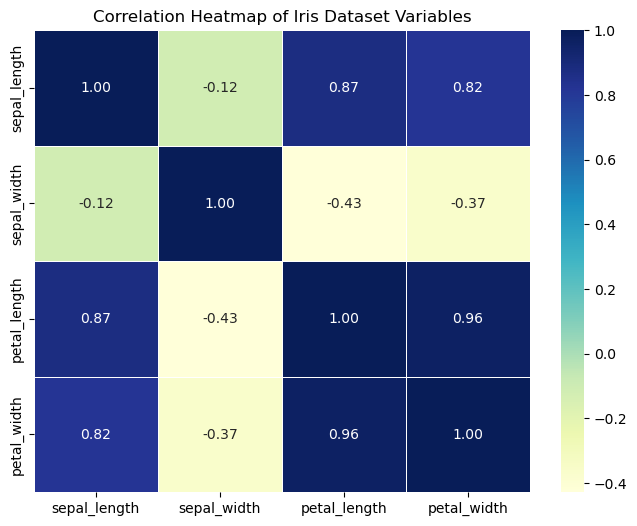

In [39]:
# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5) # We can use annot to show the values and fmt for decimal places
plt.title('Correlation Heatmap of Iris Dataset Variables')
plt.show()